In [88]:
install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [89]:
install.packages('tensorflow')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [122]:
library(keras)
library(tensorflow)

In [123]:
mnist = dataset_mnist()
c(c(x_train, y_train), c(x_test, y_test)) %<-% mnist

In [113]:
length(x_train)/60000
length(x_test)
length(y_train)
length(y_test)
28*28

[1] 784

[1] 7840000

[1] 60000

[1] 10000

[1] 784

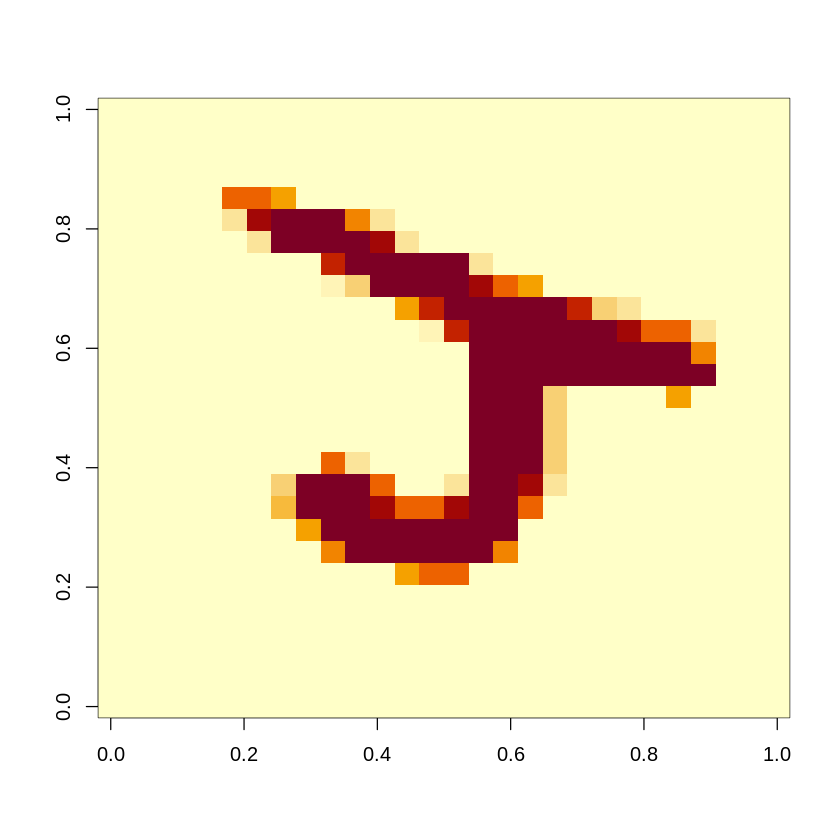

In [92]:
image(x_train[41097,,])

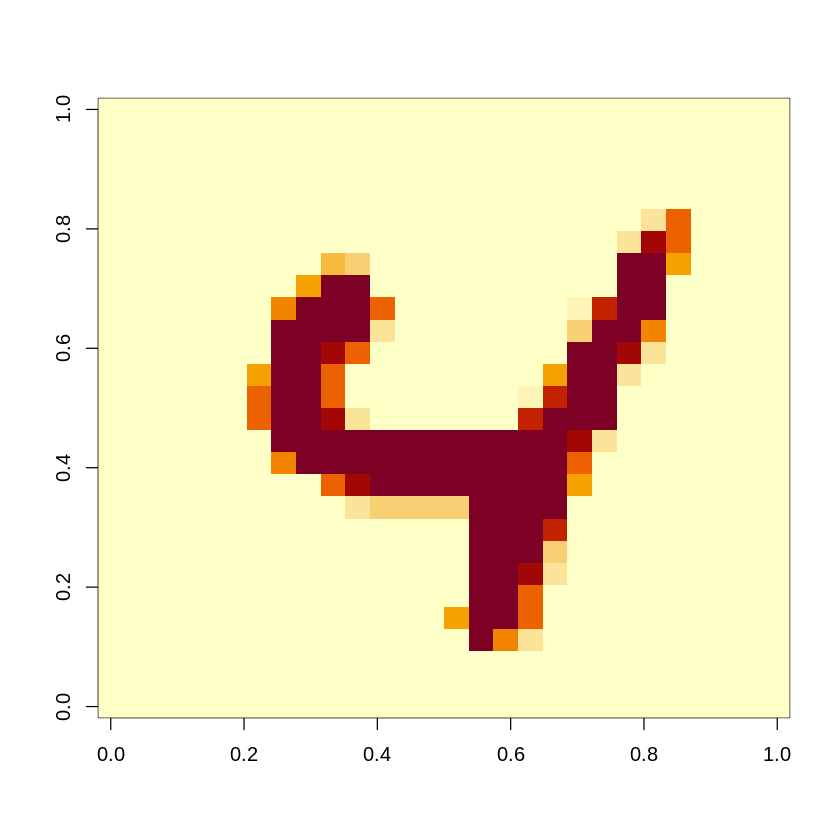

In [93]:
plotImage = function(im) {
  image(t(apply(im, 2, rev)))
}
plotImage(x_train[41097,,])

In [124]:
x_train = array_reshape(x_train, c(60000, 28, 28, 1))
#print(x_train)
x_train = x_train / 255
#print(x_train)
x_test  = array_reshape(x_test, c(10000, 28, 28, 1))
x_test  = x_test / 255

In [125]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)


In [126]:
denseModel = keras_model_sequential() %>%
    layer_flatten(input_shape = c(28,28,1)) %>%
    layer_dense(units = 64, activation = "relu") %>%
    layer_dense(units = 10, activation = "softmax")


denseModel %>% compile(
  optimizer = "adam",
  loss = "categorical_crossentropy",
  metrics = c("accuracy")
)

denseModel %>% fit(
  x_train, y_train,
  epochs = 15, batch_size=128
)

In [127]:
result1 = evaluate(denseModel, x_train, y_train)
result1
result = evaluate(denseModel, x_test, y_test)
result

loss   accuracy 
0.03079428 0.99223334

loss   accuracy 
0.08812942 0.97369999

In [130]:
inputs = layer_input(shape=c(28,28,1))
z = layer_conv_2d(inputs, filters=32, kernel_size=c(3,3), activation="selu")
z = layer_max_pooling_2d(z, pool_size = c(2, 2))
z = layer_conv_2d(z, filters = 64, kernel_size = c(3, 3), activation = "relu")
z = layer_max_pooling_2d(z, pool_size = c(2, 2))
z = layer_conv_2d(z, filters = 64, kernel_size = c(3, 3), activation = "relu")
z = layer_dropout(z, rate = 0.3)
z = layer_batch_normalization(z)
outputs = z
model = keras_model(inputs, outputs)

In [131]:
z = layer_flatten(z)
z = layer_dense(z, units = 64, activation = "selu")
outputs = layer_dense(z, units = 10, activation = "softmax")
model = keras_model(inputs, outputs)

compile(model, optimizer="adam", loss="categorical_crossentropy", metrics=c("accuracy"))
fit(model, x_train, y_train, epochs=10, batch_size=64)

result1 = model %>% evaluate( x_train, y_train)
result1
results = model %>% evaluate(x_test, y_test)
results

loss    accuracy 
0.007258597 0.997733355

loss   accuracy 
0.03047903 0.99269998

loss   accuracy 
0.03158094 0.99110001

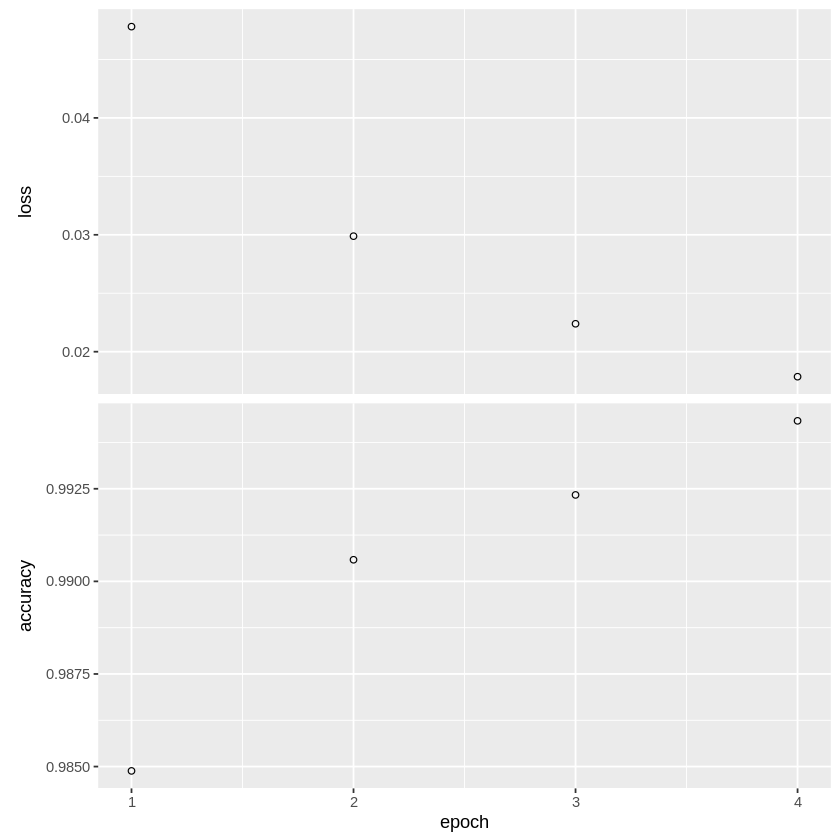

In [103]:
history = model %>% fit(x_train, y_train, epochs=4, batch_size=128)
plot(history)
results = model %>% evaluate(x_test, y_test)
results

In [ ]:

# РњРѕР¶РµРјРѕ С‚Р°РєРѕР¶ РїСЂРё С‚СЂРµРЅСѓРІР°РЅРЅС– РІРёРєРѕСЂРёСЃС‚Р°С‚Рё С‚РµСЃС‚РѕРІС–/РІР°Р»С–РґР°С†С–Р№РЅС– РґР°РЅС– Р° РЅРµ С‚СЂРµРЅСѓРІР°Р»СЊРЅС–
history = model %>% fit(x_train, y_train, epochs=3, batch_size=512, validation_data=list(x=x_test, y=y_test))
results = model %>% evaluate(x_test, y_test)
results
plot(history)

# Callbacks
history = model %>% fit(
   x_train,
   y_train,
   epochs=3,
   batch_size=512,
   validation_data=list(x=x_test, y=y_test),
   callbacks = list(
      callback_model_checkpoint("checkpoints.h5", save_best_only=TRUE),
      callback_reduce_lr_on_plateau(monitor = "val_loss", factor = 0.1)
   )
)


# РњРѕР¶РµРјРѕ Р·Р°РІР°РЅС‚Р°Р¶РёС‚Рё РІР¶Рµ РЅР°С‚СЂРµРЅРѕРІР°РЅСѓ РјРµСЂРµР¶Сѓ, С‚СѓС‚ РјРё РѕС‚СЂРёРјР°С”РјРѕ Embedding layer РґР»СЏ РїРѕРґР°Р»СЊС€РѕРіРѕ РІРёРєРѕСЂРёСЃС‚Р°РЅРЅСЏ

vgg16Model = application_vgg16( weights = "imagenet", include_top = FALSE, input_shape = c(150, 150, 3))